# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from statsmodels.graphics.correlation import plot_corr

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###
test_size = 0.2
random_state = 23
n_estimators= 100
max_depth = 29
alpha = 0.01

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv('https://github.com/AbdulwasiuInusa/load-shortfall-regression-predict-api/blob/master/utils/data/df_train.csv?raw=true')
df_t = pd.read_csv('https://github.com/AbdulwasiuInusa/load-shortfall-regression-predict-api/blob/master/utils/data/df_test.csv?raw=true')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


Exploring Train data

In [3]:
# look at data statistics
df.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


In [4]:
### see column titles
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

We notice that there are some non-numeric columns in the dataset.

Checking for missing values

In [6]:
#total number of missing values in train dataset
df.isnull().sum().sum()

2068

In [7]:
#find columns with missing values
df.columns[df.isnull().any()]

Index(['Valencia_pressure'], dtype='object')

In [8]:
#Confirm missing values count
len(df.Valencia_pressure) - df.Valencia_pressure.count()

2068


### Inspecting dataset


##### Univariate Non Graphical Analysis

Separating the numeric and non numeric columns to make more sense of the univariate analysis

In [9]:
# Getting the non numeric columns
non_numeric_cols = pd.Index(set(df.columns).difference(set(df.select_dtypes(include=(np.number)).columns)))
df_non_num = df[non_numeric_cols]
df_non_num

,time,Valencia_wind_deg,Seville_pressure
0,2015-01-01 03:00:00,level_5,sp25
1,2015-01-01 06:00:00,level_10,sp25
2,2015-01-01 09:00:00,level_9,sp25
3,2015-01-01 12:00:00,level_8,sp25
4,2015-01-01 15:00:00,level_7,sp25
...,...,...,...
8758,2017-12-31 09:00:00,level_6,sp23
8759,2017-12-31 12:00:00,level_6,sp23
8760,2017-12-31 15:00:00,level_9,sp22
8761,2017-12-31 18:00:00,level_8,sp23


We conclude that `Seville_pressure` and `Valencia_wind_deg` are categorical data. ``Time`` will dealt with later on.

In [10]:
# we count the unique values and find their modes

print("Mode of Seville_pressure is: ", df.Seville_pressure.mode())
print('Sevile pressure has {} categories:'.format(len(df.Seville_pressure.unique())))
print(list(df.Seville_pressure.unique()))
print('\n')
print("Mode of Valencia_wind_deg is: ", df.Valencia_wind_deg.mode())
print('Valencia_wind_deg has {} categories:'.format(len(df.Valencia_wind_deg.unique())))
print(list(df.Valencia_wind_deg.unique()))

Mode of Seville_pressure is:  0    sp13
Name: Seville_pressure, dtype: object
Sevile pressure has 25 categories:
['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19', 'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20', 'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1']


Mode of Valencia_wind_deg is:  0    level_1
Name: Valencia_wind_deg, dtype: object
Valencia_wind_deg has 10 categories:
['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6', 'level_4', 'level_3', 'level_1', 'level_2']


In [11]:
# Getting the numeric columns and carrying out univariate analysis
df_numeric = df._get_numeric_data()
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


We conclude here that `Unnamed: 0` is an unnecessary column to be cleaned later.

#### Further Investigating the data type of '`weather id`' columns.

We suspecting it to be categorical data.
After observing that the columns contained numerical values and Valencia had no data entry for weather_id. We count the unique values, then find their minimum, maximum and modal values.

In [12]:
#counting the unique values and find their minimum, maximum and modal values
print('Barcelona_weather_id has {} unique variables:'.format(len(df.Barcelona_weather_id.unique())))
print("Max of Barcelona_weather_id is: ", df.Barcelona_weather_id.max())
print("Min of Barcelona_weather_id is: ", df.Barcelona_weather_id.min())
print("Mode of Barcelona_weather_id is: ", df.Barcelona_weather_id.mode())

print(list(df.Barcelona_weather_id.unique()))

Barcelona_weather_id has 269 unique variables:
Max of Barcelona_weather_id is:  804.0
Min of Barcelona_weather_id is:  200.6666666667
Mode of Barcelona_weather_id is:  0    800.0
Name: Barcelona_weather_id, dtype: float64
[800.0, 801.0, 803.0, 801.3333333333, 800.3333333333, 803.3333333333, 802.0, 800.6666666667, 701.3333333333, 600.6666666667, 500.0, 700.3333333333, 700.0, 802.3333333333, 803.6666666667, 801.6666666667, 802.6666666667, 701.6666666667, 702.6666666667, 501.0, 500.6666666667, 601.3333333333, 501.3333333333, 703.3333333333, 804.0, 702.0, 701.0, 602.0, 600.0, 503.0, 502.3333333333, 501.6666666667, 703.0, 603.3333333333, 601.0, 700.6666666667, 702.3333333333, 603.0, 500.3333333333, 601.6666666667, 668.0, 600.3333333333, 433.6666666667, 466.8333333333, 502.0, 356.6666666667, 404.3333333333, 602.3333333333, 504.6666666667, 359.8333333333, 456.3333333333, 408.6666666667, 405.1666666667, 356.0, 652.8333333333, 417.8333333333, 556.3333333333, 408.3333333333, 405.0, 469.0, 453.66

In [13]:
# we count the unique values and find their modes
print('Bilbao_weather_id has {} unique variables:'.format(len(df.Bilbao_weather_id.unique())))
print("Max of Bilbao_weather_id is: ", df.Bilbao_weather_id.max())
print("Min of Bilbao_weather_id is: ", df.Bilbao_weather_id.min())
print("Mode of Bilbao_weather_id is: ", df.Bilbao_weather_id.mode())

Bilbao_weather_id has 356 unique variables:
Max of Bilbao_weather_id is:  804.0
Min of Bilbao_weather_id is:  207.3333333333
Mode of Bilbao_weather_id is:  0    800.0
Name: Bilbao_weather_id, dtype: float64


In [14]:
# we count the unique values and find their modes
print('Madrid_weather_id has {} unique variables:'.format(len(df.Madrid_weather_id.unique())))
print("Max of Madrid_weather_id is: ", df.Madrid_weather_id.max())
print("Min of Madrid_weather_id is: ", df.Madrid_weather_id.min())
print("Mode of Madrid_weather_id is: ", df.Madrid_weather_id.mode())

Madrid_weather_id has 289 unique variables:
Max of Madrid_weather_id is:  804.0
Min of Madrid_weather_id is:  211.0
Mode of Madrid_weather_id is:  0    800.0
Name: Madrid_weather_id, dtype: float64


In [15]:
# we count the unique values and find their modes
print('Seville_weather_id has {} unique variables:'.format(len(df.Seville_weather_id.unique())))
print("Max of Seville_weather_id is: ", df.Seville_weather_id.max())
print("Min of Seville_weather_id is: ", df.Seville_weather_id.min())
print("Mode of Seville_weather_id is: ", df.Seville_weather_id.mode())

Seville_weather_id has 301 unique variables:
Max of Seville_weather_id is:  804.0
Min of Seville_weather_id is:  200.0
Mode of Seville_weather_id is:  0    800.0
Name: Seville_weather_id, dtype: float64


We notice they all had the same mode (i.e., 800.0) and maximum values( 804.0). It makes sense to have states in a country to have a particular weather condition frequently occuring over time. We therefore conclude that '`weather_id`' are categorical and were just appelations to identify recorded data.

### Proceeding to graphical univariate analysis

#### Categorical Features

<AxesSubplot:xlabel='Valencia_wind_deg', ylabel='count'>

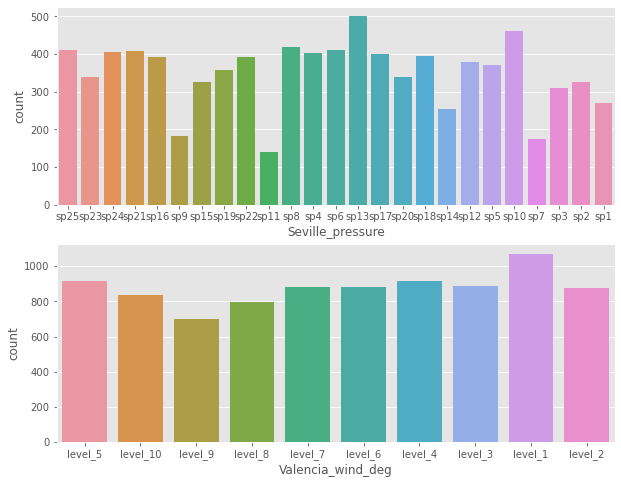

In [16]:
#Countplots for Non-numeric categorical data to see their variation.

plt.style.use('ggplot')
plt.subplots(figsize = (10,8))
plt.subplot(2,1,1)
sns.countplot(x = 'Seville_pressure', data = df)
plt.subplot(2,1,2)
sns.countplot(x = 'Valencia_wind_deg', data = df)


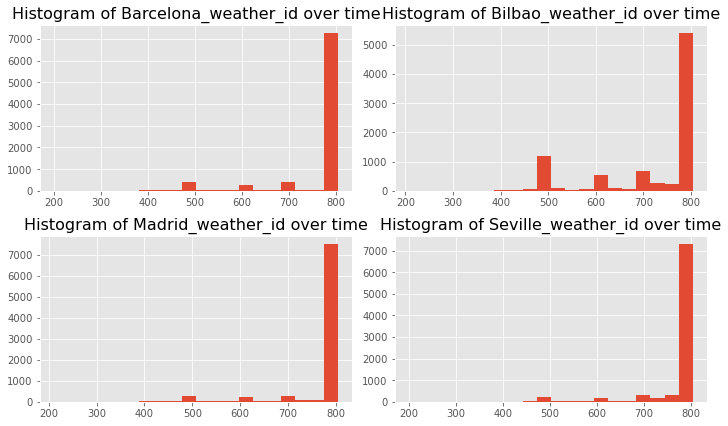

In [17]:
#Histogram for numeric categorical data

Weather_id = ['Barcelona_weather_id','Bilbao_weather_id', 'Madrid_weather_id', 'Seville_weather_id']

fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()
for index, column in enumerate(Weather_id):
    axs[index].set_title("Histogram of {} over time".format(column), fontsize=16)
    axs[index].hist(df[column], bins = 20)
fig.tight_layout(pad=1)

### Non Categorical Features

#### Some Important Feature Distributions

##### Wind degrees

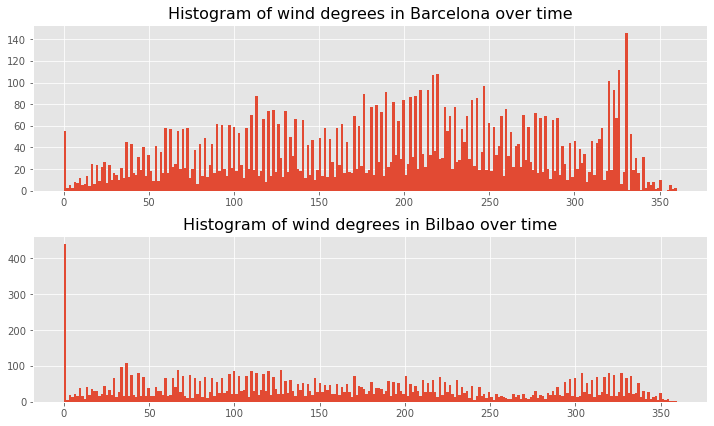

In [18]:
#Plotting histogram so show distribution of wind degrees across states.

fig, axs = plt.subplots(2,1, figsize=(10,6))
fig.subplots_adjust(hspace = 0.5, wspace=.2)

axs[0].set_title("Histogram of wind degrees in Barcelona over time", fontsize=16)
axs[0].hist(df.Barcelona_wind_deg, bins=250) #,edgecolor='k', color='blue'

axs[1].set_title("Histogram of wind degrees in Bilbao over time", fontsize=16)
axs[1].hist(df.Bilbao_wind_deg, bins=250) #,edgecolor='k', color='blue'

fig.tight_layout(pad=1)

We discover that the wind degrees in both Barcelona and Bilbao have outliers, but the outlier in Bilbao seems more severe.

### Pressures

<AxesSubplot:xlabel='Valencia_pressure'>

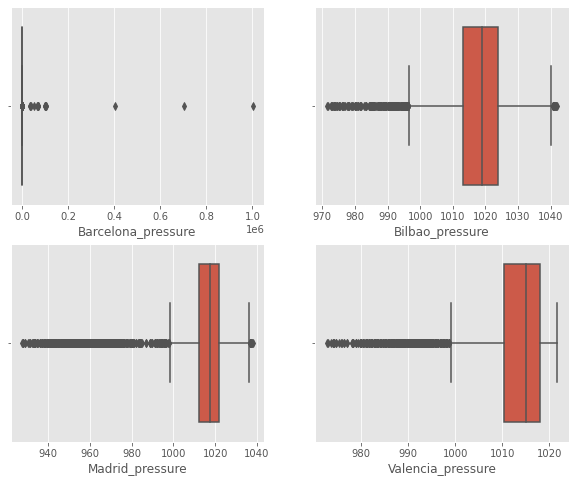

In [19]:
# Seville_pressure data type is a not an integer or float, so is omitted.

plt.style.use('ggplot')
plt.subplots(figsize = (10,8))
plt.subplot(2,2,1)
sns.boxplot(x = df.Barcelona_pressure)
plt.subplot(2,2,2)
sns.boxplot(x = df.Bilbao_pressure)
plt.subplot(2,2,3)
sns.boxplot(x = df.Madrid_pressure)
plt.subplot(2,2,4)
sns.boxplot(x = df.Valencia_pressure)


All pressures have serious outliers, Barcelona_pressure has the worst outlier occurence and seems extremely skewed to the right, while others are left-skewed

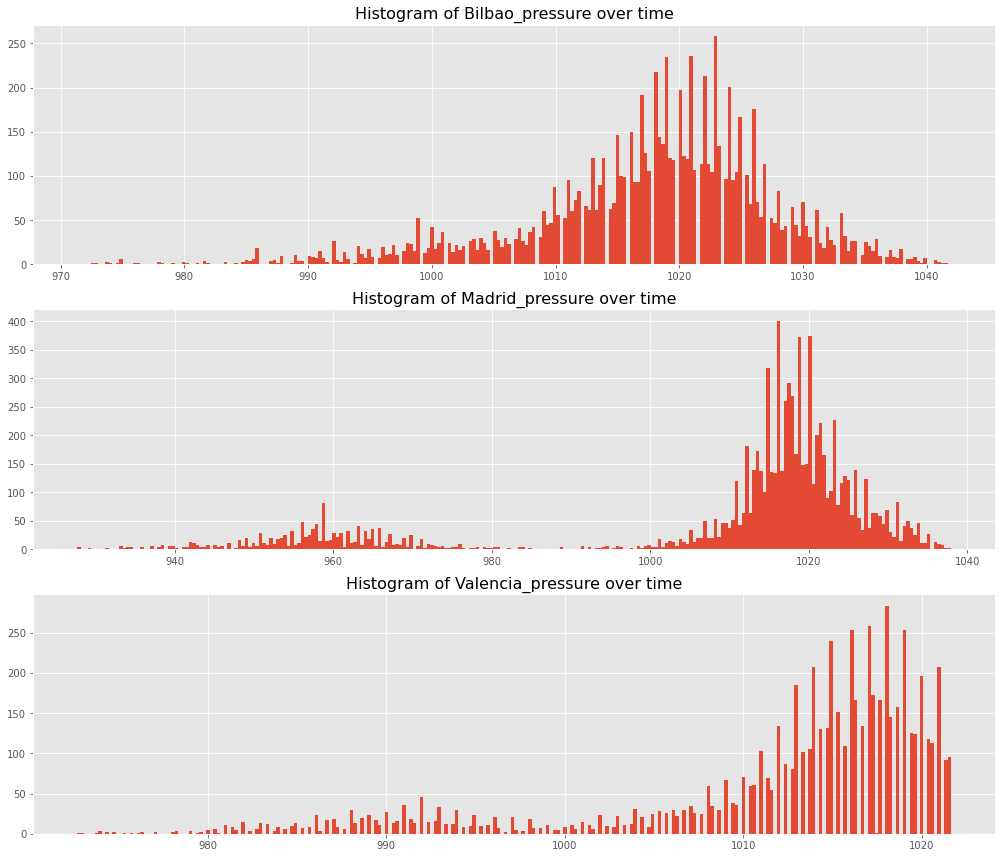

In [20]:
## Checking on Pressure
pressures = ['Bilbao_pressure', 'Madrid_pressure', 'Valencia_pressure']

fig, axs = plt.subplots(3,1, figsize=(14,12))
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()
for index, column in enumerate(pressures):
    axs[index].set_title("Histogram of {} over time".format(column), fontsize=16)
    axs[index].hist(df[column], bins = 250)
fig.tight_layout(pad=1)

The 3 states' pressures seem to have a double-peaked pressurre distribution.

### Humidities

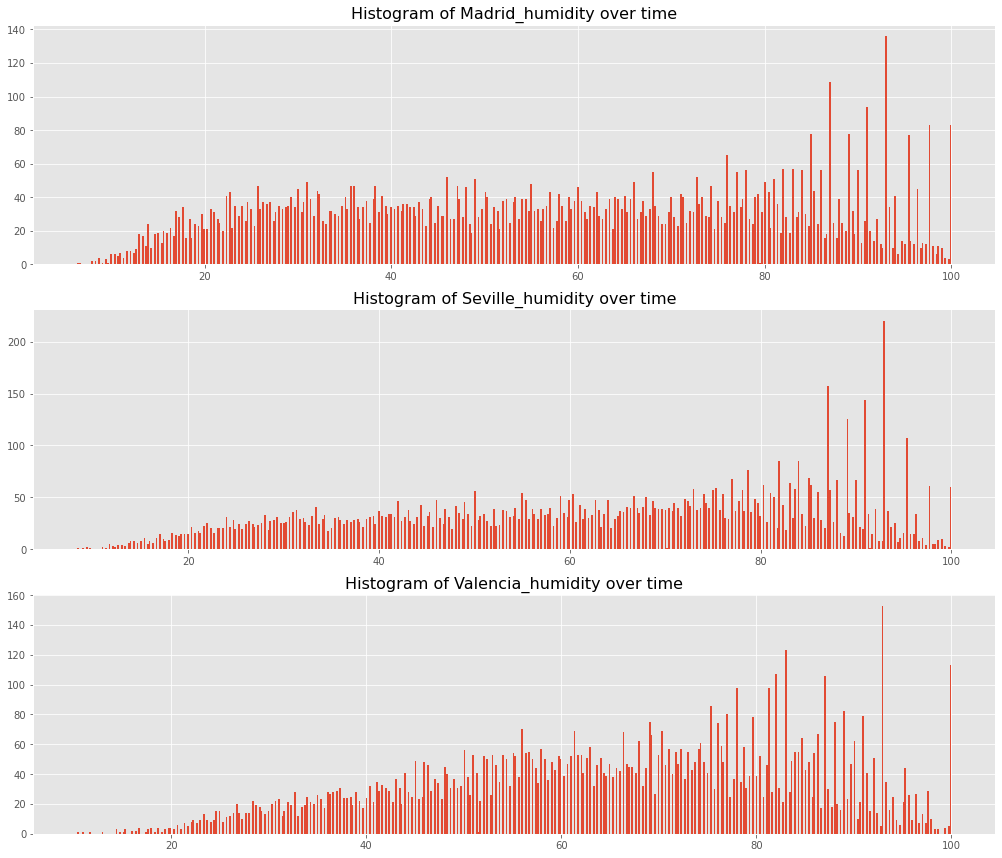

In [21]:
## Checking on Humidities
humidities = ['Madrid_humidity', 'Seville_humidity', 'Valencia_humidity']

fig, axs = plt.subplots(3,1, figsize=(14,12))
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()
for index, column in enumerate(humidities):
    axs[index].set_title("Histogram of {} over time".format(column), fontsize=16)
    axs[index].hist(df[column], bins = 500)
    
fig.tight_layout(pad=1)

The humidities all seem to be left-skewed.

### Temperatures

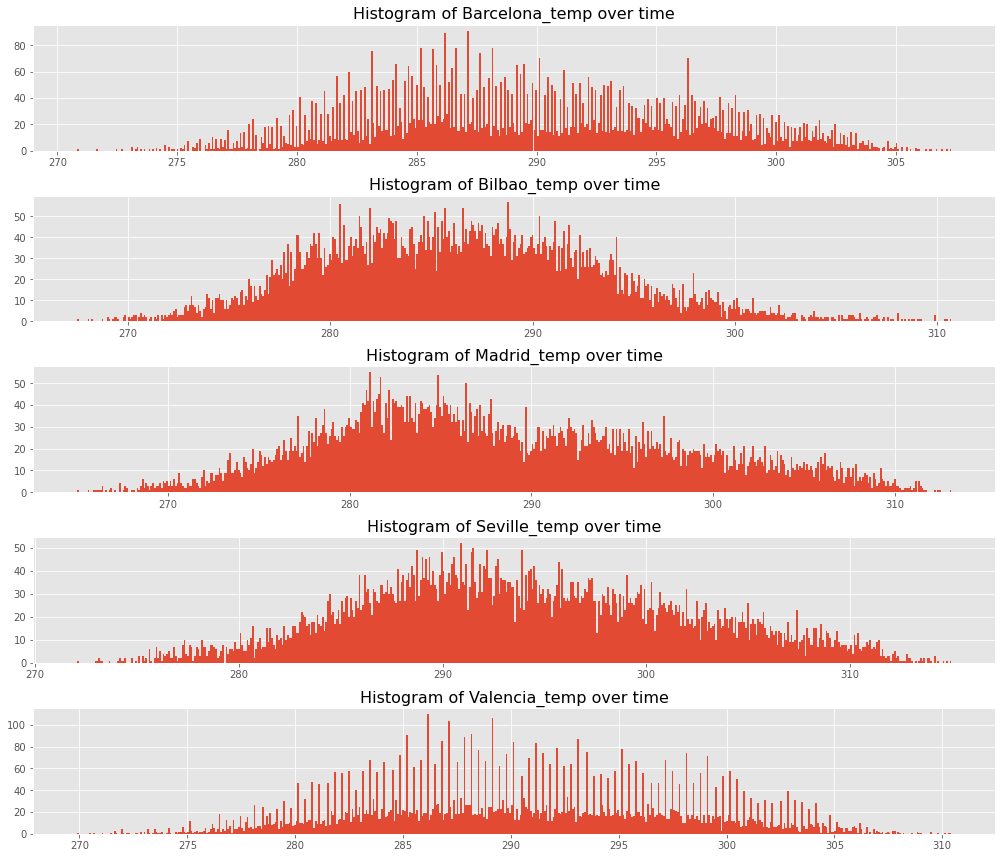

In [22]:
## Checking on Temperatures
temperatures = ['Barcelona_temp', 'Bilbao_temp', 'Madrid_temp', 'Seville_temp', 'Valencia_temp']

fig, axs = plt.subplots(5,1, figsize=(14,12))
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()
for index, column in enumerate(temperatures):
    axs[index].set_title("Histogram of {} over time".format(column), fontsize=16)
    axs[index].hist(df[column], bins = 500) #,edgecolor='k', color='blue'
fig.tight_layout(pad=1)

The distribution of temperature in all states all tend be normally distributed over time.

### Windspeeds

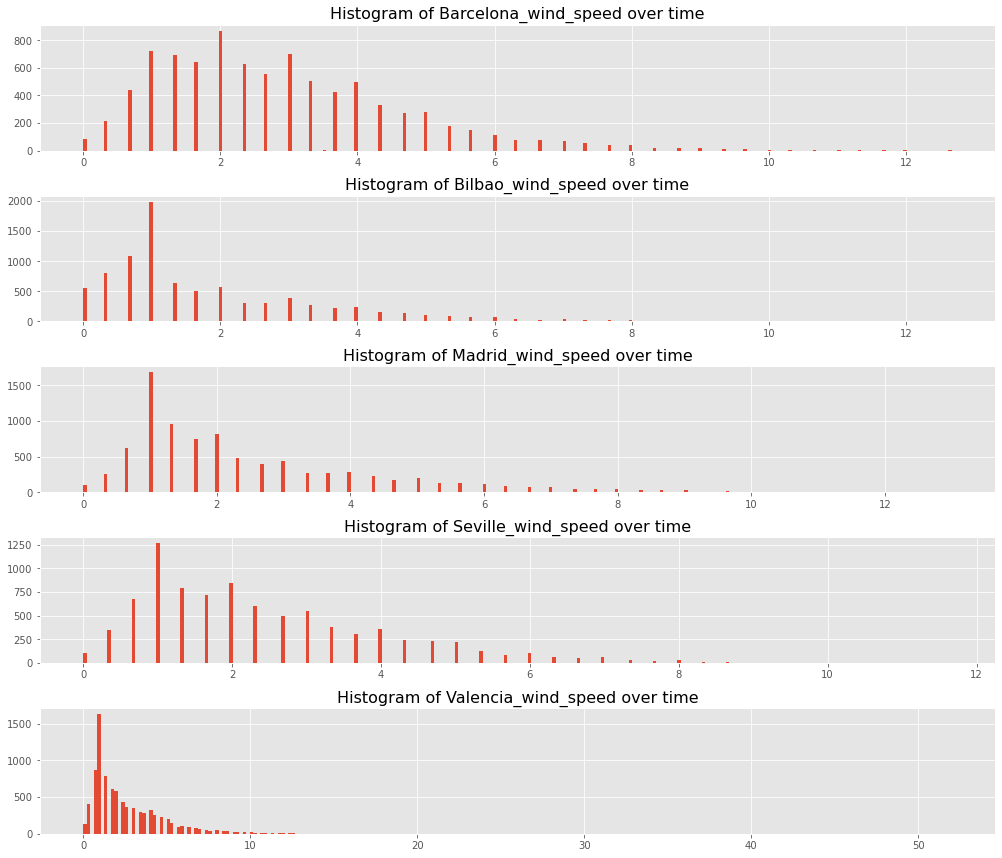

In [23]:
## Checking on Windspeeds
windspeeds = ['Barcelona_wind_speed', 'Bilbao_wind_speed', 'Madrid_wind_speed', 'Seville_wind_speed', 'Valencia_wind_speed']

fig, axs = plt.subplots(5,1, figsize=(14,12))
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()
for index, column in enumerate(windspeeds):
    axs[index].set_title("Histogram of {} over time".format(column), fontsize=16)
    axs[index].hist(df[column], bins = 250) #,edgecolor='k', color='blue'
fig.tight_layout(pad=1)

All states have their windspeeds distributed with a right-tailed skew.
Valencia wind speed seem to have the most extreme outliers

## Multivariate EDA

Checking correlating features

Investigating '`temp`' columns

In [24]:
temperatures = ['Barcelona_temp', 'Bilbao_temp', 'Madrid_temp', 'Seville_temp', 'Valencia_temp']
max_tempratures = ['Barcelona_temp_max', 'Bilbao_temp_max', 'Madrid_temp_max', 'Seville_temp_max', 'Valencia_temp_max']
min_temperatures = ['Barcelona_temp_min', 'Bilbao_temp_min', 'Madrid_temp_min', 'Seville_temp_min', 'Valencia_temp_min']

print(df[temperatures].mean(),'\n', df[max_tempratures].mean(), '\n', df[min_temperatures].mean())

Barcelona_temp    289.855459
Bilbao_temp       286.422929
Madrid_temp       288.419439
Seville_temp      293.978903
Valencia_temp     290.592152
dtype: float64 
 Barcelona_temp_max    291.157644
Bilbao_temp_max       287.966027
Madrid_temp_max       289.540309
Seville_temp_max      297.479527
Valencia_temp_max     291.337233
dtype: float64 
 Barcelona_temp_min    288.447422
Bilbao_temp_min       285.017973
Madrid_temp_min       287.202203
Seville_temp_min      291.633356
Valencia_temp_min     289.867648
dtype: float64


In [25]:
df[temperatures].corr()

,Barcelona_temp,Bilbao_temp,Madrid_temp,Seville_temp,Valencia_temp
Barcelona_temp,1.000000,0.865705,0.903143,0.852651,0.914601
Bilbao_temp,0.865705,1.000000,0.875271,0.839014,0.854892
Madrid_temp,0.903143,0.875271,1.000000,0.917075,0.915753
Seville_temp,0.852651,0.839014,0.917075,1.000000,0.887040
Valencia_temp,0.914601,0.854892,0.915753,0.887040,1.000000


In [26]:
df[max_tempratures].corr()

,Barcelona_temp_max,Bilbao_temp_max,Madrid_temp_max,Seville_temp_max,Valencia_temp_max
Barcelona_temp_max,1.000000,0.844563,0.906248,0.738489,0.918256
Bilbao_temp_max,0.844563,1.000000,0.846887,0.726510,0.837574
Madrid_temp_max,0.906248,0.846887,1.000000,0.772369,0.917838
Seville_temp_max,0.738489,0.726510,0.772369,1.000000,0.771964
Valencia_temp_max,0.918256,0.837574,0.917838,0.771964,1.000000


In [27]:
df[min_temperatures].corr()

,Barcelona_temp_min,Bilbao_temp_min,Madrid_temp_min,Seville_temp_min,Valencia_temp_min
Barcelona_temp_min,1.000000,0.831224,0.838985,0.831689,0.879687
Bilbao_temp_min,0.831224,1.000000,0.845799,0.847007,0.832773
Madrid_temp_min,0.838985,0.845799,1.000000,0.907758,0.860347
Seville_temp_min,0.831689,0.847007,0.907758,1.000000,0.871738
Valencia_temp_min,0.879687,0.832773,0.860347,0.871738,1.000000


Comparing their averages we discovered that '`_temp`' colums roughly averages between '`_temp_min` and `temp_max`' columns. The temperatures all strongly correlate with one another across all states. We conclude that anyone of them would suffice to train our model with.

##### Investigating how all features in each state correlate with load shortfall?

In [28]:
Barcelona_features = ['Barcelona_pressure', 'Barcelona_rain_1h', 'Barcelona_rain_3h', 'Barcelona_temp', 
       'Barcelona_temp_max', 'Barcelona_temp_min', 'Barcelona_wind_deg', 'Barcelona_wind_speed']
Bilbao_features = ['Bilbao_clouds_all', 'Bilbao_pressure', 'Bilbao_rain_1h', 'Bilbao_snow_3h', 
       'Bilbao_temp', 'Bilbao_temp_max', 'Bilbao_temp_min', 'Bilbao_wind_deg', 'Bilbao_wind_speed']
Madrid_features = ['Madrid_clouds_all', 'Madrid_humidity', 'Madrid_pressure','Madrid_rain_1h', 
       'Madrid_temp', 'Madrid_temp_max', 'Madrid_temp_min', 'Madrid_wind_speed']
Seville_features = ['Seville_clouds_all', 'Seville_humidity', 'Seville_pressure', 'Seville_rain_1h',
       'Seville_rain_3h', 'Seville_temp', 'Seville_temp_max', 'Seville_temp_min', 'Seville_wind_speed']
Valencia_features = ['Valencia_humidity', 'Valencia_pressure', 'Valencia_snow_3h', 'Valencia_temp', 
       'Valencia_temp_max', 'Valencia_temp_min', 'Valencia_wind_deg', 'Valencia_wind_speed']

In [29]:
df[Barcelona_features].corrwith(df.load_shortfall_3h)

Barcelona_pressure     -0.034385
Barcelona_rain_1h      -0.056633
Barcelona_rain_3h      -0.024720
Barcelona_temp          0.182673
Barcelona_temp_max      0.164734
Barcelona_temp_min      0.195984
Barcelona_wind_deg     -0.116133
Barcelona_wind_speed   -0.103633
dtype: float64

In [30]:
df[Bilbao_features].corrwith(df.load_shortfall_3h)

Bilbao_clouds_all   -0.127293
Bilbao_pressure      0.039052
Bilbao_rain_1h      -0.152510
Bilbao_snow_3h      -0.031721
Bilbao_temp          0.176411
Bilbao_temp_max      0.180934
Bilbao_temp_min      0.172920
Bilbao_wind_deg     -0.120800
Bilbao_wind_speed   -0.081602
dtype: float64

In [31]:
df[Madrid_features].corrwith(df.load_shortfall_3h)

Madrid_clouds_all   -0.081623
Madrid_humidity     -0.150536
Madrid_pressure      0.092638
Madrid_rain_1h      -0.027159
Madrid_temp          0.186036
Madrid_temp_max      0.182548
Madrid_temp_min      0.174744
Madrid_wind_speed   -0.150981
dtype: float64

In [32]:
df[Seville_features].corrwith(df.load_shortfall_3h)

Seville_clouds_all   -0.091804
Seville_humidity     -0.167290
Seville_rain_1h      -0.031572
Seville_rain_3h      -0.032945
Seville_temp          0.159343
Seville_temp_max      0.109834
Seville_temp_min      0.174718
Seville_wind_speed   -0.048433
dtype: float64

In [33]:
df[Valencia_features].corrwith(df.load_shortfall_3h)

Valencia_humidity      0.043140
Valencia_pressure      0.086022
Valencia_snow_3h      -0.021633
Valencia_temp          0.173225
Valencia_temp_max      0.144270
Valencia_temp_min      0.201863
Valencia_wind_speed   -0.142791
dtype: float64

We discover that all temperatures i.e., '`temp`, `temp_max`, `temp_min`' were consistently the most significant positively correlating features with '`load shortfall`'.
Also '`windspeeds`', '`wind degrees`', '`clouds_all`' and all '`_3h` features' were consistently negatively correlating with '`load shortfall`'

#### Graphical Multivariate EDA

#### Plotting relevant feature interactions

How individual features correlate across states

#### Humidity between states

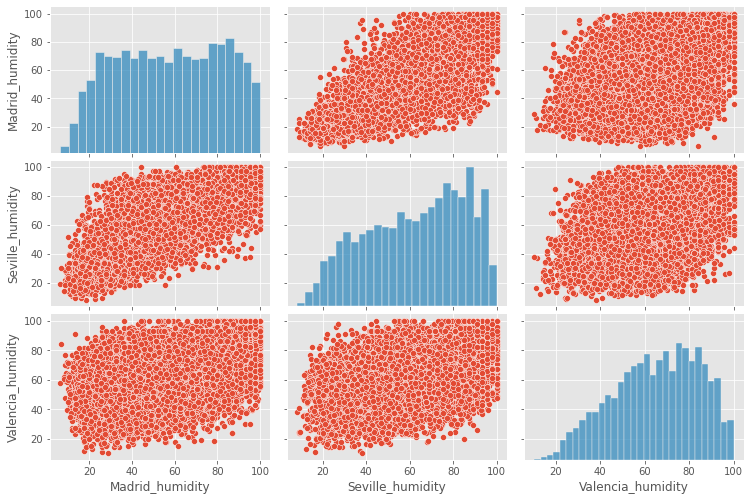

In [34]:
humidity = ['Madrid_humidity', 'Seville_humidity', 'Valencia_humidity']
from seaborn import pairplot
g = pairplot(df[humidity])
g.fig.set_size_inches(11,7)

For states with recorded humidities, their humidities all tend to has a positive relationship as they seem to have increased over time relative to one another.

#### Temperatures vs windspeeds across states

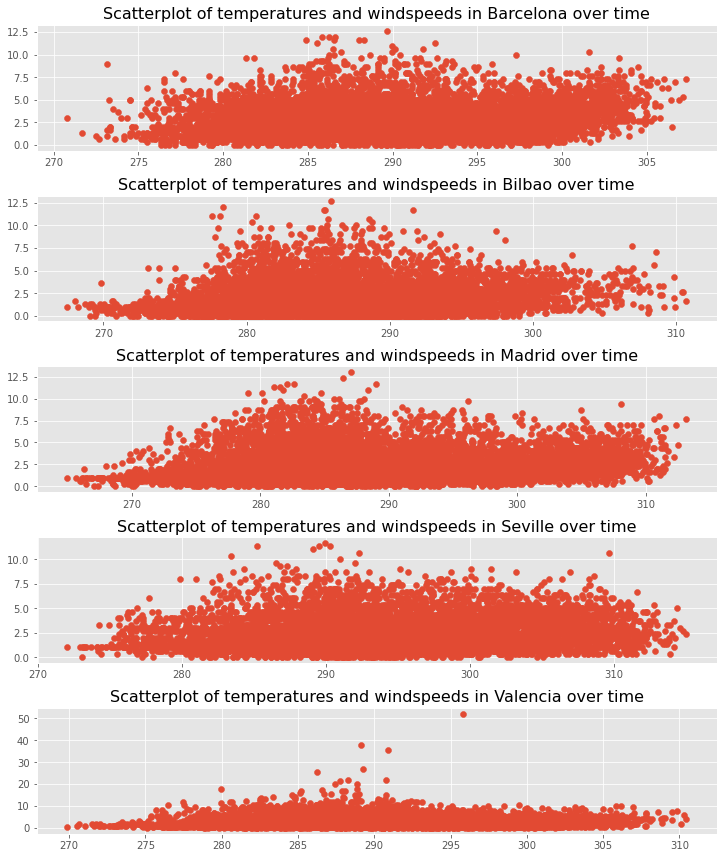

In [35]:
#Scatter plots of temp and windspeeds

fig, axs = plt.subplots(5,1, figsize=(10,12))
fig.subplots_adjust(hspace = 0.5, wspace=.2)

axs[0].set_title("Scatterplot of temperatures and windspeeds in Barcelona over time", fontsize=16)
axs[0].scatter(df.Barcelona_temp, df.Barcelona_wind_speed) #,edgecolor='k', color='blue'

axs[1].set_title("Scatterplot of temperatures and windspeeds in Bilbao over time", fontsize=16)
axs[1].scatter(df.Bilbao_temp, df.Bilbao_wind_speed) #,edgecolor='k', color='blue'

axs[2].set_title("Scatterplot of temperatures and windspeeds in Madrid over time", fontsize=16)
axs[2].scatter(df.Madrid_temp, df.Madrid_wind_speed) #,edgecolor='k', color='blue'

axs[3].set_title("Scatterplot of temperatures and windspeeds in Seville over time", fontsize=16)
axs[3].scatter(df.Seville_temp, df.Seville_wind_speed) #,edgecolor='k', color='blue'

axs[4].set_title("Scatterplot of temperatures and windspeeds in Valencia over time", fontsize=16)
axs[4].scatter(df.Valencia_temp, df.Valencia_wind_speed) #,edgecolor='k', color='blue'

fig.tight_layout(pad=1)

The temperatures and windspeeds in all states do not seem to have any interactions

#### Temperatures vs pressures

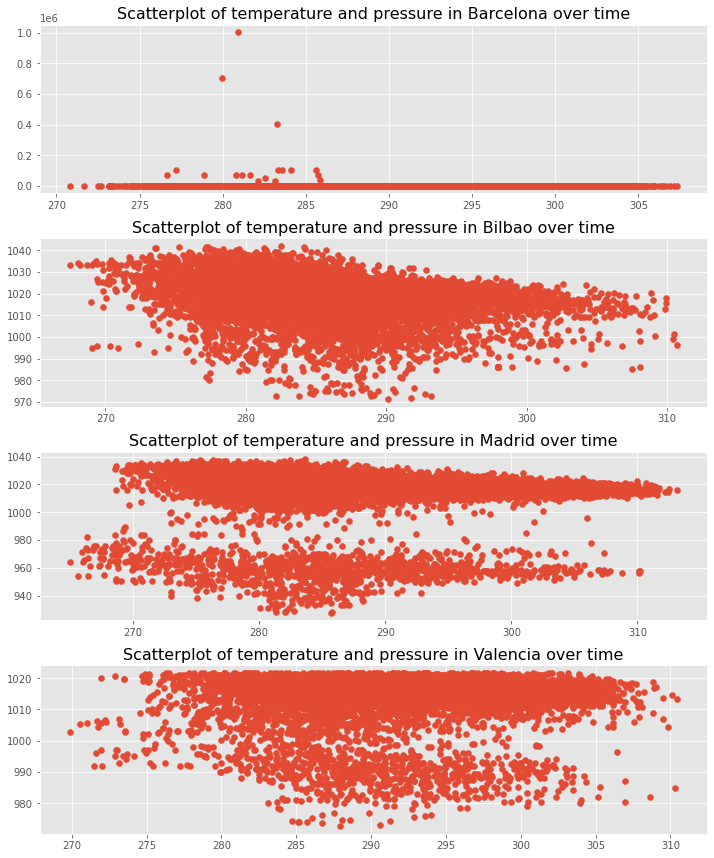

In [36]:
#temperatures and pressures

fig, axs = plt.subplots(4,1, figsize=(10,12))
fig.subplots_adjust(hspace = 0.5, wspace=.2)

axs[0].set_title("Scatterplot of temperature and pressure in Barcelona over time", fontsize=16)
axs[0].scatter(df.Barcelona_temp, df.Barcelona_pressure) #,edgecolor='k', color='blue'

axs[1].set_title("Scatterplot of temperature and pressure in Bilbao over time", fontsize=16)
axs[1].scatter(df.Bilbao_temp, df.Bilbao_pressure) #,edgecolor='k', color='blue'

axs[2].set_title("Scatterplot of temperature and pressure in Madrid over time", fontsize=16)
axs[2].scatter(df.Madrid_temp, df.Madrid_pressure) #,edgecolor='k', color='blue'

axs[3].set_title("Scatterplot of temperature and pressure in Valencia over time", fontsize=16)
axs[3].scatter(df.Valencia_temp, df.Valencia_pressure) #,edgecolor='k', color='blue'

fig.tight_layout(pad=1)

Except for Barcelona, It seems like temperatures and pressures in all others state have a slightly negative relationship.

<AxesSubplot:>

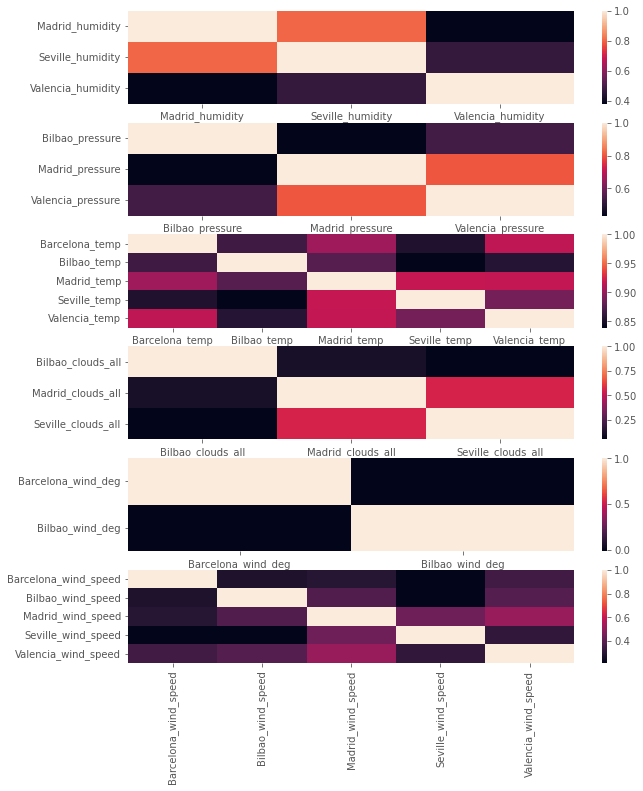

In [37]:
# to evaluate correlation
humidity = ['Madrid_humidity', 'Seville_humidity', 'Valencia_humidity']
pressure = ['Bilbao_pressure', 'Madrid_pressure', 'Seville_pressure',  'Valencia_pressure']
clouds_all = ['Bilbao_clouds_all', 'Madrid_clouds_all', 'Seville_clouds_all']
temperature = ['Barcelona_temp', 'Bilbao_temp', 'Madrid_temp',  'Seville_temp',  'Valencia_temp']
wind_degree = ['Barcelona_wind_deg', 'Bilbao_wind_deg', 'Valencia_wind_deg']
wind_speed= ['Barcelona_wind_speed', 'Bilbao_wind_speed', 'Madrid_wind_speed',  'Seville_wind_speed', 'Valencia_wind_speed']

plt.style.use('ggplot')
plt.subplots(figsize = (10,12), squeeze=True)
plt.subplot(6,1,1)
sns.heatmap(df[humidity].corr(), square=False)
plt.subplot(6,1,2)
sns.heatmap(df[pressure].corr(), square=False)
plt.subplot(6,1,3)
sns.heatmap(df[temperature].corr(), square=False)
plt.subplot(6,1,4)
sns.heatmap(df[clouds_all].corr(), square=False)
plt.subplot(6,1,5)
sns.heatmap(df[wind_degree].corr(), square=False)
plt.subplot(6,1,6)
sns.heatmap(df[wind_speed].corr(), square=False)

### EDA on Test data set

Exploring Test data

In [38]:
# peek at data content
df_t.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


In [39]:
### see column titles
df_t.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

As expected test data doesnt contain '`load_shortfall`'

In [40]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

We notice that there are some non-numeric columns in the dataset.

Checking for missing values

In [41]:
#total number of missing values in train dataset
df_t.isnull().sum().sum()

454

In [42]:
#find columns with missing values
df_t.columns[df_t.isnull().any()]

Index(['Valencia_pressure'], dtype='object')

In [43]:
#Confirm missing values count
len(df_t.Valencia_pressure) - df_t.Valencia_pressure.count()

454


### Inspecting dataset


Separating the numeric and non numeric columns to make more sense of the univariate analysis

In [44]:
# Getting the non numeric columns
non_numeric_cols = pd.Index(set(df_t.columns).difference(set(df_t.select_dtypes(include=(np.number)).columns)))
df_t_non_num = df_t[non_numeric_cols]
df_t_non_num

,time,Valencia_wind_deg,Seville_pressure
0,2018-01-01 00:00:00,level_8,sp25
1,2018-01-01 03:00:00,level_8,sp25
2,2018-01-01 06:00:00,level_7,sp25
3,2018-01-01 09:00:00,level_7,sp25
4,2018-01-01 12:00:00,level_7,sp25
...,...,...,...
2915,2018-12-31 09:00:00,level_9,sp24
2916,2018-12-31 12:00:00,level_8,sp24
2917,2018-12-31 15:00:00,level_6,sp23
2918,2018-12-31 18:00:00,level_6,sp23


Train and Test data set has same non-numeric columns

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

### For Train data

#### Handling missing values in features


In [45]:
# replace null values with the mean of the column
df.Valencia_pressure.fillna(df['Valencia_pressure'].mean(), inplace=True)

In [46]:
# check if null values have been replaced
df['Valencia_pressure'].isnull().sum()

0

#### Dropping irrelevant features

In [47]:
df.drop('Unnamed: 0', axis=1, inplace=True)
#df.drop(Weather_id, axis= 1, inplace = True)

#### Removing Outliers

We had noticed Barcelona_pressure as the column most severely affected with outliers, we would decide on removing them or replacing them here.

In [48]:
#Find the outliers
a = df.sort_values(by = ['Barcelona_pressure'])
a[['Barcelona_pressure']].tail(20) #display the largest outliers

,Barcelona_pressure
6210,1.039000e+03
10,1.039000e+03
401,3.395467e+04
404,3.416700e+04
400,3.758567e+04
409,5.044367e+04
408,6.692667e+04
410,6.701600e+04
411,6.703633e+04
412,6.708467e+04


we notice the occurence of outliers being sequential, i.e. between index 398 and 415, totalling 18 badly recorded data.

In [49]:
#finding the logical maximum pressure value across other states
print(df[pressures].max())

Bilbao_pressure      1042.000000
Madrid_pressure      1038.000000
Valencia_pressure    1021.666667
dtype: float64


In [50]:

#Find the outliers in Valencia_wind_speed
c = df.sort_values(by = ['Valencia_wind_speed'])
c[['Valencia_wind_speed']].tail(10) #display the largest outliers


,Valencia_wind_speed
237,20.000000
415,20.000000
229,21.333333
230,22.000000
233,22.000000
426,25.333333
235,26.666667
234,35.333333
232,37.666667
6887,52.000000


In [51]:
#Check percentage of outliers to entire train data

print('The outliers in Barcelona_pressure account for {} percent of train data'
        .format(round(len(df[df.Barcelona_pressure > 1050])/len(df) * 100,2)))
print('The outliers in Valencia_wind_speed account for {} percent of train data'
        .format(round(len(df[df.Valencia_wind_speed>= 40])/len(df) * 100,2)))

The outliers in Barcelona_pressure account for 0.21 percent of train data
The outliers in Valencia_wind_speed account for 0.01 percent of train data


Comparing the maximum pressures from the other states shows a logical consistency with the maximum value of Barcelona_pressure abssent the apparent outliers.

Hence we set a logical maximum value of 1050 for pressures and delete the extreme values, since they contribute very little to the data population

In [52]:
#remove rows containing outliers in Barcelona_pressures
df = df[df.Barcelona_pressure <= 1050]

#remove rows for Valencia_wind_speeds
df = df[df.Valencia_wind_speed < 40]

#### For Test data

In [53]:
# replace null values with the mean of the column
df_t.Valencia_pressure.fillna(df['Valencia_pressure'].mean(), inplace=True)

In [54]:
# check if null values have been replaced
df_t['Valencia_pressure'].isnull().sum()

0

In [55]:
#dropping irrelevant features
df_t.drop('Unnamed: 0', axis=1, inplace=True)
#df_t.drop(Weather_id, axis= 1, inplace = True)

## Engineer existing features

#### For train data

In [56]:
#Extracting numeric values from non-numeric columns and converting to float data type for uniformity

df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)')
df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)')

df[['Seville_pressure', 'Valencia_wind_deg']] = df[['Seville_pressure', 'Valencia_wind_deg']].astype(float)

In [57]:
#Converting time column to datetime data type

df['time'] = pd.to_datetime(df['time'])

In [58]:
#Confirm changes

df[['time','Valencia_wind_deg', 'Seville_pressure']].dtypes

time                 datetime64[ns]
Valencia_wind_deg           float64
Seville_pressure            float64
dtype: object

### For Test data

In [59]:
#Extracting numeric values from non-numeric columns and converting to float data type for uniformity

df_t['Valencia_wind_deg'] = df_t['Valencia_wind_deg'].str.extract('(\d+)')
df_t['Seville_pressure'] = df_t['Seville_pressure'].str.extract('(\d+)')

df_t[['Seville_pressure', 'Valencia_wind_deg']] = df_t[['Seville_pressure', 'Valencia_wind_deg']].astype(float)

In [60]:
#Identify columns with int data type

myCols = df_t.select_dtypes(include='int').columns
myCols

Index(['Bilbao_snow_3h', 'Valencia_snow_3h'], dtype='object')

In [61]:
#Converting integer-type columns to float for uniformity

df_t[['Bilbao_snow_3h', 'Valencia_snow_3h']] = df_t[['Bilbao_snow_3h', 'Valencia_snow_3h']].astype(float)
#df_t['Valencia_snow_3h'] = df_t['Valencia_snow_3h'].astype(float)

In [62]:
#Converting time column to datetime data type

df_t['time'] = pd.to_datetime(df_t['time'])

In [63]:
#Confirm changes

df_t[['time','Valencia_wind_deg', 'Seville_pressure', 'Valencia_snow_3h', 'Bilbao_snow_3h']].dtypes

time                 datetime64[ns]
Valencia_wind_deg           float64
Seville_pressure            float64
Valencia_snow_3h            float64
Bilbao_snow_3h              float64
dtype: object

### Create new features

#### For Train and Test data

Create columns for **days**, **month**, **years** and **hours** from the time column. So our model may  make better predictions.   

In [64]:
df['Day'], df_t['Day'] = df['time'].dt.day, df_t['time'].dt.day
df['Month'], df_t['Month'] = df['time'].dt.month, df_t['time'].dt.month
df['Year'], df_t['Year']= df['time'].dt.year, df_t['time'].dt.year
df['Hour'], df_t['Hour'] = df['time'].dt.hour, df_t['time'].dt.hour

In [65]:
#Check feature creation
df[['Day', 'Month', 'Year', 'Hour']].head(5)

,Day,Month,Year,Hour
0,1,1,2015,3
1,1,1,2015,6
2,1,1,2015,9
3,1,1,2015,12
4,1,1,2015,15


In [66]:
df_t[['Day', 'Month', 'Year', 'Hour']].head(5)

,Day,Month,Year,Hour
0,1,1,2018,0
1,1,1,2018,3
2,1,1,2018,6
3,1,1,2018,9
4,1,1,2018,12


In [67]:
#Converting columns to float for uniformity

df[['Day', 'Month', 'Year', 'Hour']] = df[['Day', 'Month', 'Year', 'Hour']].astype(float)
df_t[['Day', 'Month', 'Year', 'Hour']] = df_t[['Day', 'Month', 'Year', 'Hour']].astype(float)

In [68]:
# Confirm changes
print(df[['Day', 'Month', 'Year', 'Hour']].dtypes)
print(df_t[['Day', 'Month', 'Year', 'Hour']].dtypes)

Day      float64
Month    float64
Year     float64
Hour     float64
dtype: object
Day      float64
Month    float64
Year     float64
Hour     float64
dtype: object


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### Split Train data

Before splitting, we first drop the '`weather_id`,`min_temperatures`, `max_temperatures` and '`time`' columns from our modelling and test data

In [69]:
cols_to_drop = Weather_id + min_temperatures + max_tempratures
cols_to_drop

['Barcelona_weather_id',
 'Bilbao_weather_id',
 'Madrid_weather_id',
 'Seville_weather_id',
 'Barcelona_temp_min',
 'Bilbao_temp_min',
 'Madrid_temp_min',
 'Seville_temp_min',
 'Valencia_temp_min',
 'Barcelona_temp_max',
 'Bilbao_temp_max',
 'Madrid_temp_max',
 'Seville_temp_max',
 'Valencia_temp_max']

In [70]:
df_train = df.drop(cols_to_drop, axis=1)
df_test = df_t.drop(cols_to_drop, axis=1)

In [71]:
del df_train['time']
del df_test['time']

In [72]:
# split data
y = df_train['load_shortfall_3h']                   #target
x = df_train.drop('load_shortfall_3h', axis=1)      #features

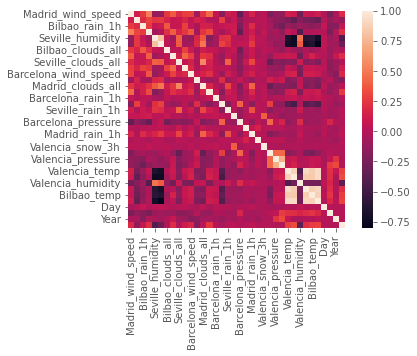

<Figure size 1440x1152 with 0 Axes>

In [97]:
#Visualizing how features correlate
sns.heatmap(x.corr(), square=True)
plt.figure(figsize=(20,16))
plt.show()


### Create ML models

#### 1. Linear Model

In [115]:
# create targets and features dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=1, shuffle=False)

In [116]:
#Generate linear regresion model
lm = LinearRegression()

In [117]:
#Training the model
lm.fit(x_train, y_train)

LinearRegression()

In [118]:
# Generate predictions from model
gen_y = lm.predict(x_train)
gen_y

array([ 8960.45383105,  8832.18948594,  9118.56148874, ...,
       11475.14844005, 11641.01122463, 12074.51363781])

In [119]:
# Test the model
gen_y_test = lm.predict(x_test)
gen_y_test

array([12301.01785029, 12607.14806661, 11948.67315191, ...,
       10798.71536377, 11434.45462946, 12039.12813153])

#### Evaluate Linear regression model

In [120]:
# define function to evaluate RMSE
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

rmse(y_test, gen_y_test)

4787.128235282874

In [121]:
#Check R-Squared score
r2_score(y_test, gen_y_test)

0.038072598587647666

### Lasso Model

In [122]:
# Create standardization object
scaler = StandardScaler()

In [123]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(x)

In [124]:
# Split dataset into train and test sets
##X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=test_size,
                                                   # random_state = random_state, shuffle=False)

In [181]:
# Create LASSO model object
lasso = Lasso(alpha=alpha)

# Train the LASSO model
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [182]:
# predict train model
Lasso_train = lasso.predict(X_train)

In [183]:
test_lasso = lasso.predict(X_test)
test_lasso

array([10765.41566905, 10923.23898556, 10569.63087373, ...,
       10318.78743812, 10371.50573073, 10461.19649449])

#### Evaluate Lasso model


In [145]:
# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test, test_lasso)))

RMSE: 5145.060557163594


In [146]:
#Compute R-Squared score
r2_score(y_test, test_lasso)

-0.004850221739348237

In [147]:
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, x.columns, columns=['Coefficient'])
coeff.head()

,Coefficient
Madrid_wind_speed,-136.784021
Valencia_wind_deg,-32.200039
Bilbao_rain_1h,87.615129
Valencia_wind_speed,99.964426
Seville_humidity,-305.917796


### Random Forest

In [148]:
# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Train test split
#x_train, x_test, y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20, random_state = 1)

In [149]:
# Our forest consists of 100 trees with a max depth of 5 in this example

RF = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, random_state= 1)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=29, random_state=1)

In [185]:
train_randomForest = RF.predict(X_train)

In [150]:
# Get predictions
y_pred = RF.predict(x_test)


#### Evaluate Random Forest model


In [151]:
# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 3107.092165291553


In [152]:
#Compute R-Squared score
r2_score(y_test, y_pred)

0.6335382738735915

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [192]:
### Compare model performance and Choose best model and motivate why it is the best choice

# Dictionary of results
results_dict = {'Training RMSE':
                    {   "Linear Regression":np.sqrt(mean_squared_error(y_train, gen_y)),
                        "LASSO":np.sqrt(mean_squared_error(y_train, Lasso_train)),
                        "RandomForest":np.sqrt(mean_squared_error(y_train,train_randomForest)),
                    },
                    'Test RMSE':
                    {   "Linear Regression":np.sqrt(metrics.mean_squared_error(y_test, gen_y_test)),
                        "LASSO":np.sqrt(metrics.mean_squared_error(y_test, test_lasso)),
                        "RandomForest":np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
                    }
                }

Random Forest provided the least RMSE score

In [193]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

In [194]:
# View the results
results_df

,Training RMSE,Test RMSE
Linear Regression,5516.367604,5486.864133
LASSO,5214.343430,5145.060557
RandomForest,6732.410857,3107.092165


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

### Discuss chosen methods logic
From the results above, we can see that RandomForest Model was able to perform better on the test data than the train data compare to others because is less overfitting and its flexible and have high predictive accuracy, while LASSO who perfome best on the train data and second on the test data while performing shrinkage on the data set also generalise model with a greater predictive capacity. The linear regression model is not flexible and with that have high bias and that bring about the tendency of underfitting and given the less accuracy on the predicting data.

In conclusion we realise that random forest is the best to on our data set and it give the best predictive accuracy and the least RMSE.
